In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(r"C:\Users\elvis\Downloads\Assignment\Data_Analyst_Assignment_Dataset.csv")

In [53]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [70]:
from IPython.display import display_png as dp

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

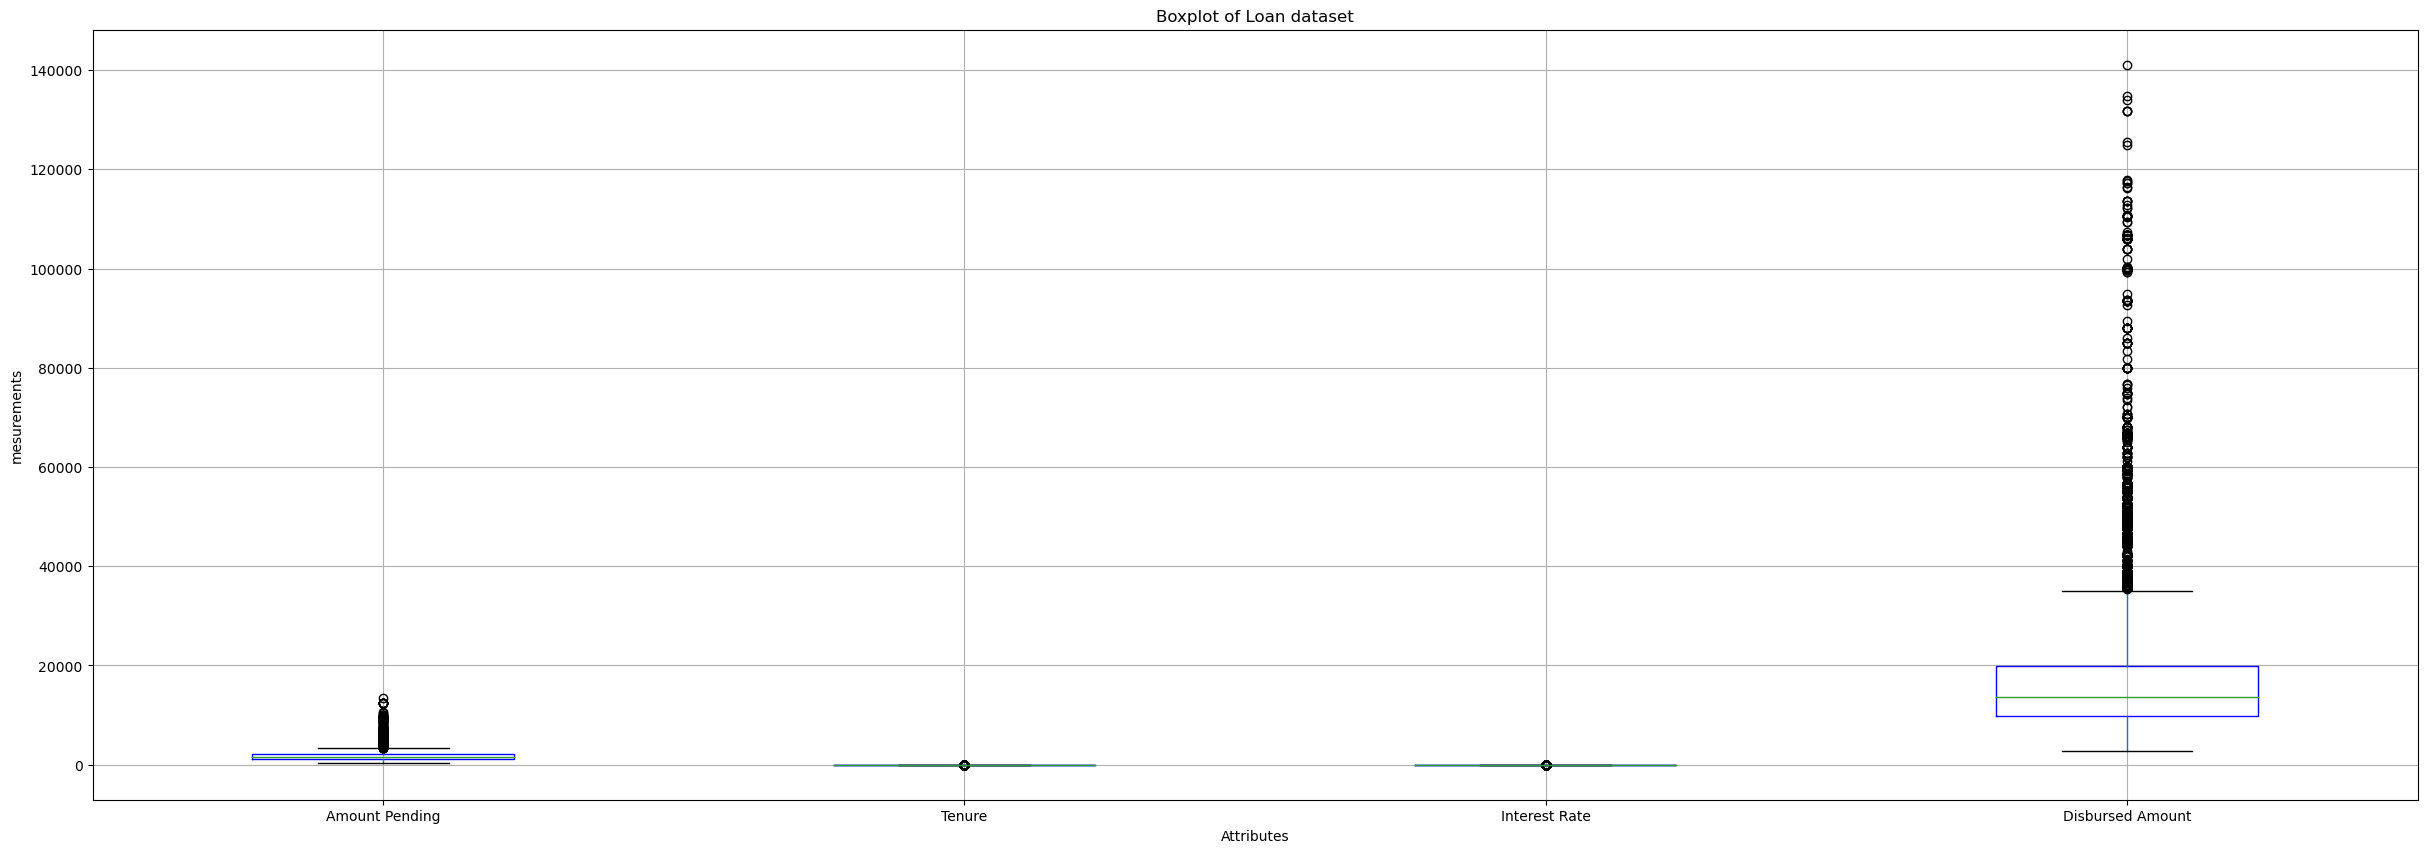

In [86]:
data.boxplot(rot=0,boxprops=dict(color='blue'),return_type='axes',figsize=(30,10))
plt.title('Boxplot of Loan dataset')
plt.suptitle('')
plt.xlabel('Attributes')
plt.ylabel('mesurements')
plt.show

In [74]:
data.describe()

,Amount Pending,Tenure,Interest Rate,Disbursed Amount
count,24582.000000,24582.000000,24582.000000,24582.000000
mean,1791.172687,9.415263,0.934960,17705.195468
std,937.565507,3.238904,3.114732,14192.671509
min,423.000000,7.000000,0.000000,2793.000000
25%,1199.000000,8.000000,0.000000,9857.750000
50%,1593.000000,8.000000,0.000000,13592.000000
75%,2083.000000,11.000000,0.000000,19968.000000
max,13349.000000,24.000000,37.920000,141072.000000


# Risk Labels for all the Borrowers. 



In [183]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\elvis\Downloads\Assignment\Data_Analyst_Assignment_Dataset.csv")

# Define a function to categorize risk based on the bounce string
def categorize_risk(row):
    bounce_string = row['Bounce String']
    if pd.isnull(bounce_string) or bounce_string == '':
        return 'Unknown risk'
    elif 'N' in bounce_string:
        return 'New customers'
    elif bounce_string.endswith('SSSSSS'):
        return 'Low risk'
    elif bounce_string.count('B') < 2 and not bounce_string.endswith('B'):
        return 'Medium risk'
    else:
        return 'High risk'

# Apply the function to categorize risk
df['Risk Category'] = df.apply(categorize_risk, axis=1)

# Display the counts of each risk category
risk_counts = df['Risk Category'].value_counts()
print('Risk Category Including Unknown:')
print(risk_counts)

Risk Category Including Unknown:
Risk Category
Medium risk    19530
High risk       4540
Low risk         512
Name: count, dtype: int64


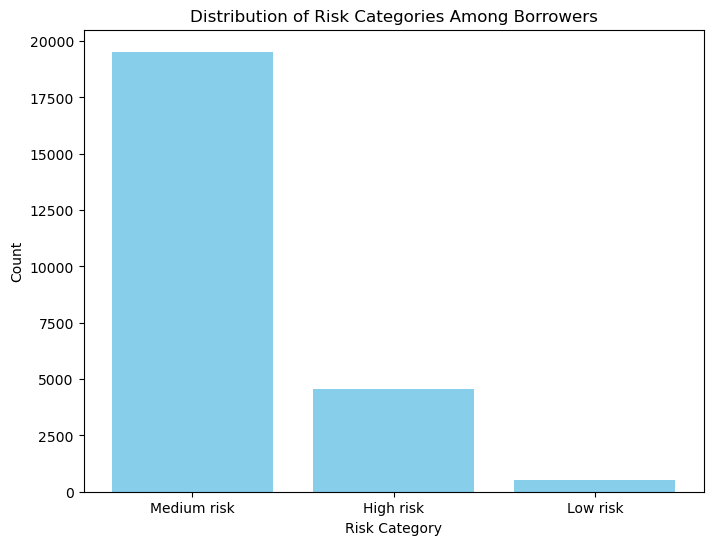

In [156]:
import matplotlib.pyplot as plt

# Plotting the distribution of risk categories
plt.figure(figsize=(8,6))
plt.bar(risk_counts.index, risk_counts.values, color='skyblue')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.title('Distribution of Risk Categories Among Borrowers')
plt.show()

In [152]:
#medium_risk_df = df[df['Risk Category'] == 'High risk'].head()
#print(medium_risk_df)

In [101]:
#df.head()

# Customers Based on where they are in their Tenure



In [89]:
import pandas as pd

# Load the dataset
df=pd.read_csv(r"C:\Users\elvis\Downloads\Assignment\Data_Analyst_Assignment_Dataset.csv")

# Assuming 'Tenure' is in months and represents the total tenure of the loan.
# We need to calculate the remaining tenure to categorize customers.
df['Remaining Tenure'] = df['Tenure'] - df['Bounce String'].apply(len)

# Categorize customers based on the given criteria
def categorize_customer(row):
    if row['Remaining Tenure'] <= 3:
        return 'Late tenure'
    elif len(row['Bounce String']) <= 3:
        return 'Early tenure'
    else:
        return 'Mid tenure'

df['Customer Tenure'] = df.apply(categorize_customer, axis=1)

# Display the distribution of customers based on tenure category
tenure_distribution = df['Customer Tenure'].value_counts()
print(tenure_distribution)

Customer Tenure
Early tenure    12419
Mid tenure       7588
Late tenure      4575
Name: count, dtype: int64


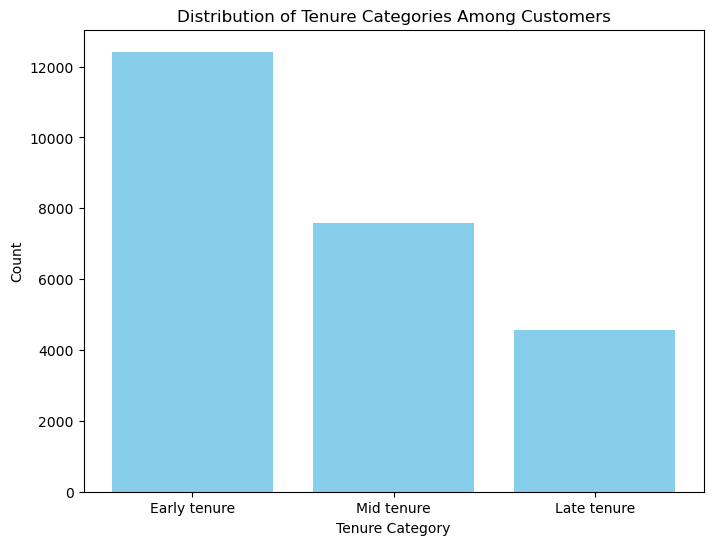

In [162]:

# Assuming 'Tenure' is in months and represents the total tenure of the loan.
# We need to calculate the remaining tenure to categorize customers.
df['Remaining Tenure'] = df['Tenure'] - df['Bounce String'].str.len()

# Define a function to categorize customers based on their tenure
def categorize_customer(row):
    if row['Remaining Tenure'] <= 3:
        return 'Late tenure'
    elif len(row['Bounce String']) <= 3:
        return 'Early tenure'
    else:
        return 'Mid tenure'

# Apply the function to categorize tenure
df['Tenure Category'] = df.apply(categorize_customer, axis=1)

# Calculate the counts of each tenure category
tenure_counts = df['Tenure Category'].value_counts()

# Plotting the distribution of tenure categories
plt.figure(figsize=(8,6))
plt.bar(tenure_counts.index, tenure_counts.values, color='skyblue')
plt.xlabel('Tenure Category')
plt.ylabel('Count')
plt.title('Distribution of Tenure Categories Among Customers')
plt.show()


In [99]:
#mid_tenure_customers = df[df['Customer Tenure'] == 'Early tenure'].head(10)
#print(mid_tenure_customers)

In [157]:
#print(df.columns)

# Segmentation of Borrowers based on Ticket Size



In [163]:
# Adjusting the code to use the correct column name

# Sort the dataframe based on the 'Amount Pending' in descending order to ensure the highest amounts are considered first
df_sorted = df.sort_values(by='Amount Pending', ascending=False)

# Calculate the total pending amount
total_pending = df_sorted['Amount Pending'].sum()

# Define the thresholds for the segments based on the total pending amount divided into three equal parts
target_per_segment = total_pending / 3

# Initialize variables to hold the sum of amounts and the labels
current_sum = 0
segment = 1
labels = []

# Loop through the sorted dataframe and assign labels based on the cumulative sum of the 'Amount Pending' amounts
for index, row in df_sorted.iterrows():
    if current_sum + row['Amount Pending'] <= target_per_segment or segment == 3:
        # Assign the label based on the current segment
        if segment == 1:
            labels.append('Low ticket size')
        elif segment == 2:
            labels.append('Medium ticket size')
        else:
            labels.append('High ticket size')
        current_sum += row['Amount Pending']
    else:
        # Move to the next segment and reset the current sum
        segment += 1
        current_sum = row['Amount Pending']
        if segment == 2:
            labels.append('Medium ticket size')
        else:
            labels.append('High ticket size')

# Add the labels to the dataframe
df_sorted['Ticket Size'] = labels

# Displaying the counts of each ticket size category
ticket_size_counts = df_sorted['Ticket Size'].value_counts()

print('Segmentation complete. Labels have been assigned based on ticket size.')
print('Counts of each ticket size category:')
print(ticket_size_counts)

# Displaying the head of the dataframe to verify the labels
print('\nDisplaying the head of the dataframe:')
print(df_sorted[['Amount Pending', 'Ticket Size']].head(10))


Segmentation complete. Labels have been assigned based on ticket size.
Counts of each ticket size category:
Ticket Size
High ticket size      12298
Medium ticket size     7730
Low ticket size        4554
Name: count, dtype: int64

Displaying the head of the dataframe:
       Amount Pending      Ticket Size
13706           13349  Low ticket size
14009           12500  Low ticket size
14158           12500  Low ticket size
15090           12500  Low ticket size
13946           12500  Low ticket size
23089           12500  Low ticket size
18012           12500  Low ticket size
9776            12500  Low ticket size
5278            12500  Low ticket size
5309            10624  Low ticket size


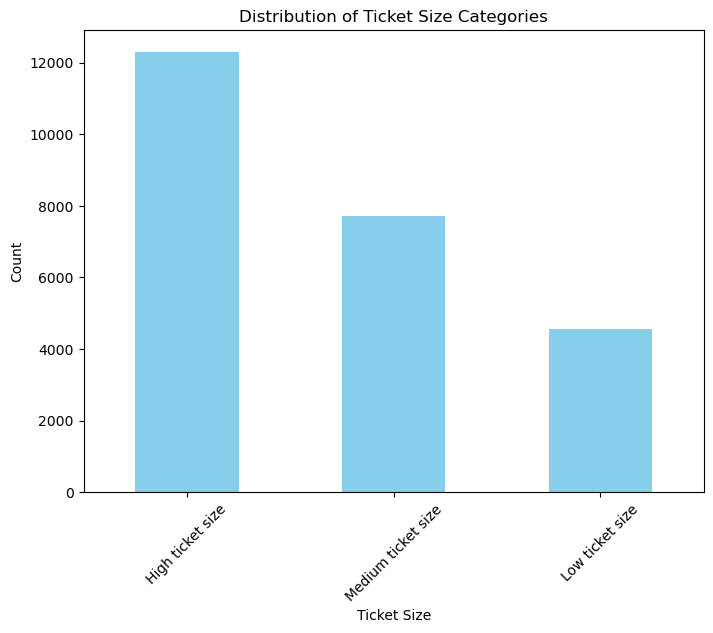

In [167]:

# Sort the dataframe based on the 'Amount Pending' in descending order to ensure the highest amounts are considered first
df_sorted = df.sort_values(by='Amount Pending', ascending=False)

# Calculate the total pending amount
total_pending = df_sorted['Amount Pending'].sum()

# Define the thresholds for the segments based on the total pending amount divided into three equal parts
target_per_segment = total_pending / 3

# Initialize variables to hold the sum of amounts and the labels
current_sum = 0
segment = 1
labels = []

# Loop through the sorted dataframe and assign labels based on the cumulative sum of the 'Amount Pending' amounts
for index, row in df_sorted.iterrows():
    if current_sum + row['Amount Pending'] <= target_per_segment or segment == 3:
        # Assign the label based on the current segment
        if segment == 1:
            labels.append('Low ticket size')
        elif segment == 2:
            labels.append('Medium ticket size')
        else:
            labels.append('High ticket size')
        current_sum += row['Amount Pending']
    else:
        # Move to the next segment and reset the current sum
        segment += 1
        current_sum = row['Amount Pending']
        if segment == 2:
            labels.append('Medium ticket size')
        else:
            labels.append('High ticket size')

# Add the labels to the dataframe
df_sorted['Ticket Size'] = labels

# Displaying the counts of each ticket size category
ticket_size_counts = df_sorted['Ticket Size'].value_counts()

# Plotting the distribution of ticket size categories
plt.figure(figsize=(8,6))
ticket_size_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Ticket Size')
plt.ylabel('Count')
plt.title('Distribution of Ticket Size Categories')
plt.xticks(rotation=45)
plt.show()


In [115]:
#medium_ticket_customers = df_sorted[df_sorted['Ticket Size'] == 'Low ticket size'].head(10)
#print(medium_ticket_customers)

In [121]:
#print(df.columns)

#df.head(25)

# Channel Spend Recommendations



In [150]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\elvis\Downloads\Assignment\Data_Analyst_Assignment_Dataset.csv")

# Initialize the 'Recommended Channel' column with default value 'Human calling'
df['Recommended Channel'] = 'Human calling'

# Update the 'Recommended Channel' based on segmentation criteria
whatsapp_criteria = (df['Amount Pending'] == 'Low risk') | (df['Bounce String'].str.endswith('FEMI')) | (df['Disbursed Amount'] == 'Low')
df.loc[whatsapp_criteria, 'Recommended Channel'] = 'Whatsapp bot'

voice_criteria = ((df['City'] == 'Metropolitan') & df['State'].isin(['Hindi', 'English']) & (df['Bounce String'].str.count('B') < 2) & df['Disbursed Amount'].isin(['Low', 'Medium']))
df.loc[voice_criteria, 'Recommended Channel'] = 'Voice bot'

# Calculate the cost for each borrower based on the criteria provided
def calculate_cost(row):
    cost = 0
    if row['Recommended Channel'] == 'Whatsapp bot':
        cost += 5
    elif row['Recommended Channel'] == 'Voice bot':
        cost += 10
    elif row['Recommended Channel'] == 'Human calling':
        cost += 50
    return cost

df['Cost'] = df.apply(calculate_cost, axis=1)

# Segment borrowers into the three channels based on cost
whatsapp_borrowers = df[df['Recommended Channel'] == 'Whatsapp bot']
voice_borrowers = df[df['Recommended Channel'] == 'Voice bot']
human_calling_borrowers = df[df['Recommended Channel'] == 'Human calling']

# Calculate the total cost for each channel
whatsapp_cost = whatsapp_borrowers['Cost'].sum()
voice_cost = voice_borrowers['Cost'].sum()
human_calling_cost = human_calling_borrowers['Cost'].sum()

# Calculate the overall spend
overall_spend = df['Cost'].sum()

whatsapp_borrowers.head(), voice_borrowers.head(), human_calling_borrowers.head(15), overall_spend


(     Amount Pending      State  Tenure  Interest Rate              City  \
 255            1150  Karnataka      11           5.32         Bangalore   
 256            1054  Karnataka      11           7.00           Bellary   
 257            1131  Karnataka      11           6.52         Bangalore   
 258             856  Karnataka      11           6.95    Chikkaballapur   
 259            1310  Karnataka      10           5.25  DAKSHINA KANNADA   
 
     Bounce String  Disbursed Amount Loan Number Recommended Channel  Cost  
 255          FEMI             12320       V2N62        Whatsapp bot     5  
 256          FEMI             11198       ULWKS        Whatsapp bot     5  
 257          FEMI             12045       MEQ0B        Whatsapp bot     5  
 258          FEMI              9097       XNMHI        Whatsapp bot     5  
 259          FEMI             12790       FL264        Whatsapp bot     5  ,
 Empty DataFrame
 Columns: [Amount Pending, State, Tenure, Interest Rate, City,

   Amount Pending      State  Tenure  Interest Rate       City Bounce String  \
0             963  Karnataka      11           7.69  Bangalore           SSS   
1            1194  Karnataka      11           6.16  Bangalore           SSB   
2            1807  Karnataka      14           4.24     Hassan           BBS   
3            2451  Karnataka      10           4.70  Bangalore           SSS   
4            2611  Karnataka      10           4.41     Mysore           SSB   

   Disbursed Amount Loan Number Channel Recommendation  Cost_Whatsapp  \
0             10197       JZ6FS          Human calling           4815   
1             12738       RDIOY          Human calling           5970   
2             24640       WNW4L          Human calling           9035   
3             23990       6LBJS          Human calling          12255   
4             25590       ZFZUA          Human calling          13055   

   Cost_Voice  Cost_Human  
0        9630       48150  
1       11940       5970

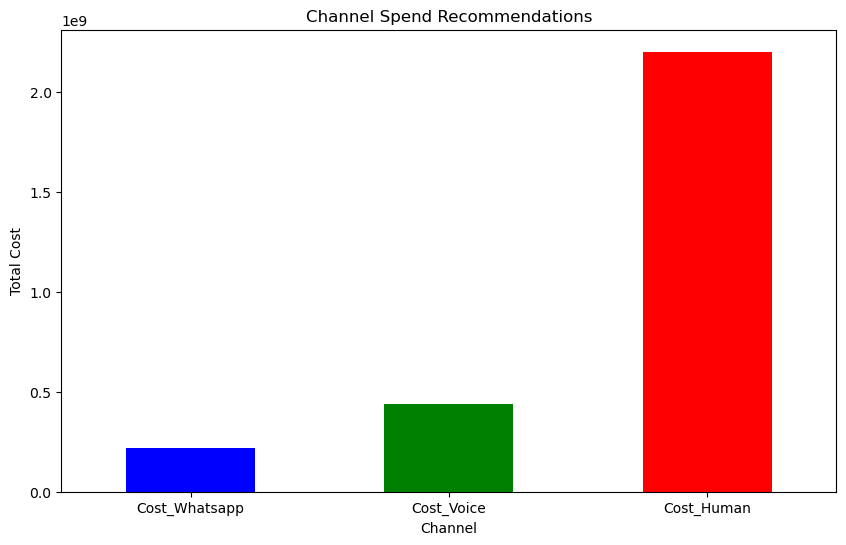

In [170]:
# Calculate the cost for each borrower based on the recommended channel
data['Cost_Whatsapp'] = 5 * data['Amount Pending']
data['Cost_Voice'] = 10 * data['Amount Pending']
data['Cost_Human'] = 50 * data['Amount Pending']

# Display the updated dataset with the calculated costs
print(data.head())
# Visualize the distribution of borrowers across the three channels
plt.figure(figsize=(10, 6))
data[['Cost_Whatsapp', 'Cost_Voice', 'Cost_Human']].sum().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Channel Spend Recommendations')
plt.xlabel('Channel')
plt.ylabel('Total Cost')
plt.xticks(rotation=0)
plt.show()

In [172]:
# Check the available columns in the dataframe
#df.columns

# Other Insights Are:--

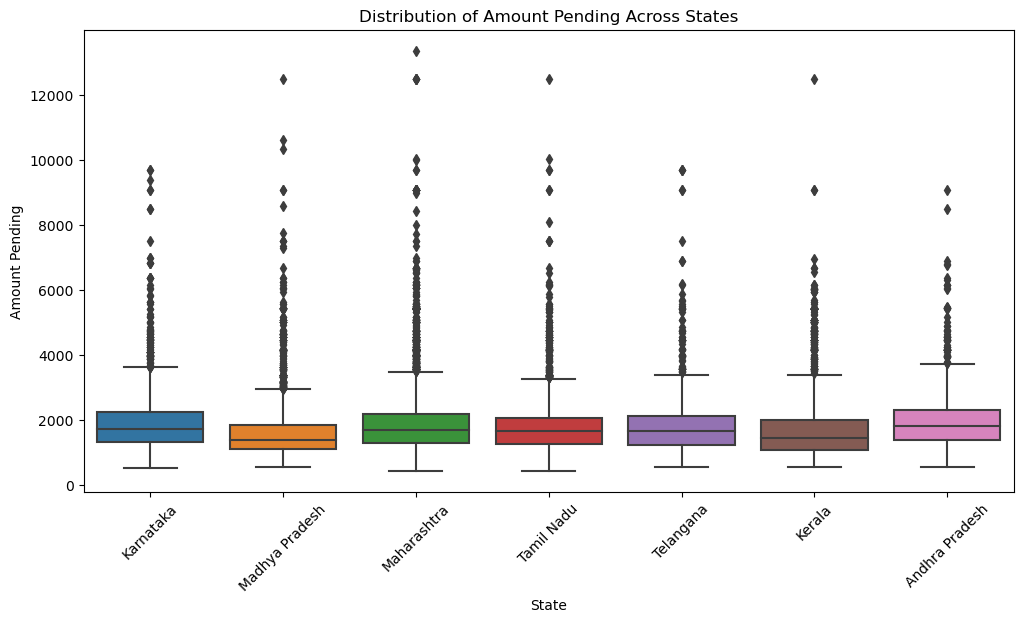

In [173]:
import seaborn as sns

# Explore the distribution of 'Amount Pending' across different states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Amount Pending', data=data)
plt.title('Distribution of Amount Pending Across States')
plt.xlabel('State')
plt.ylabel('Amount Pending')
plt.xticks(rotation=45)
plt.show()

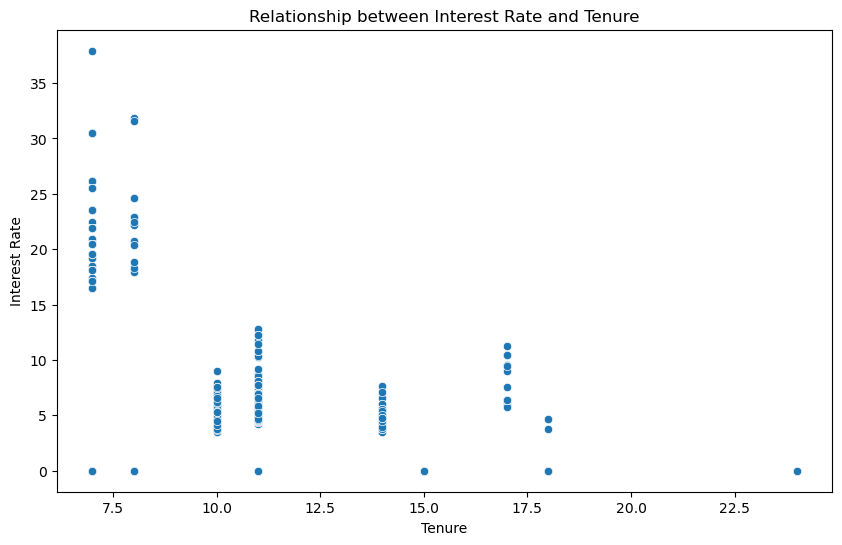

In [174]:
# Analyze the relationship between 'Interest Rate' and 'Tenure'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='Interest Rate', data=data)
plt.title('Relationship between Interest Rate and Tenure')
plt.xlabel('Tenure')
plt.ylabel('Interest Rate')
plt.show()

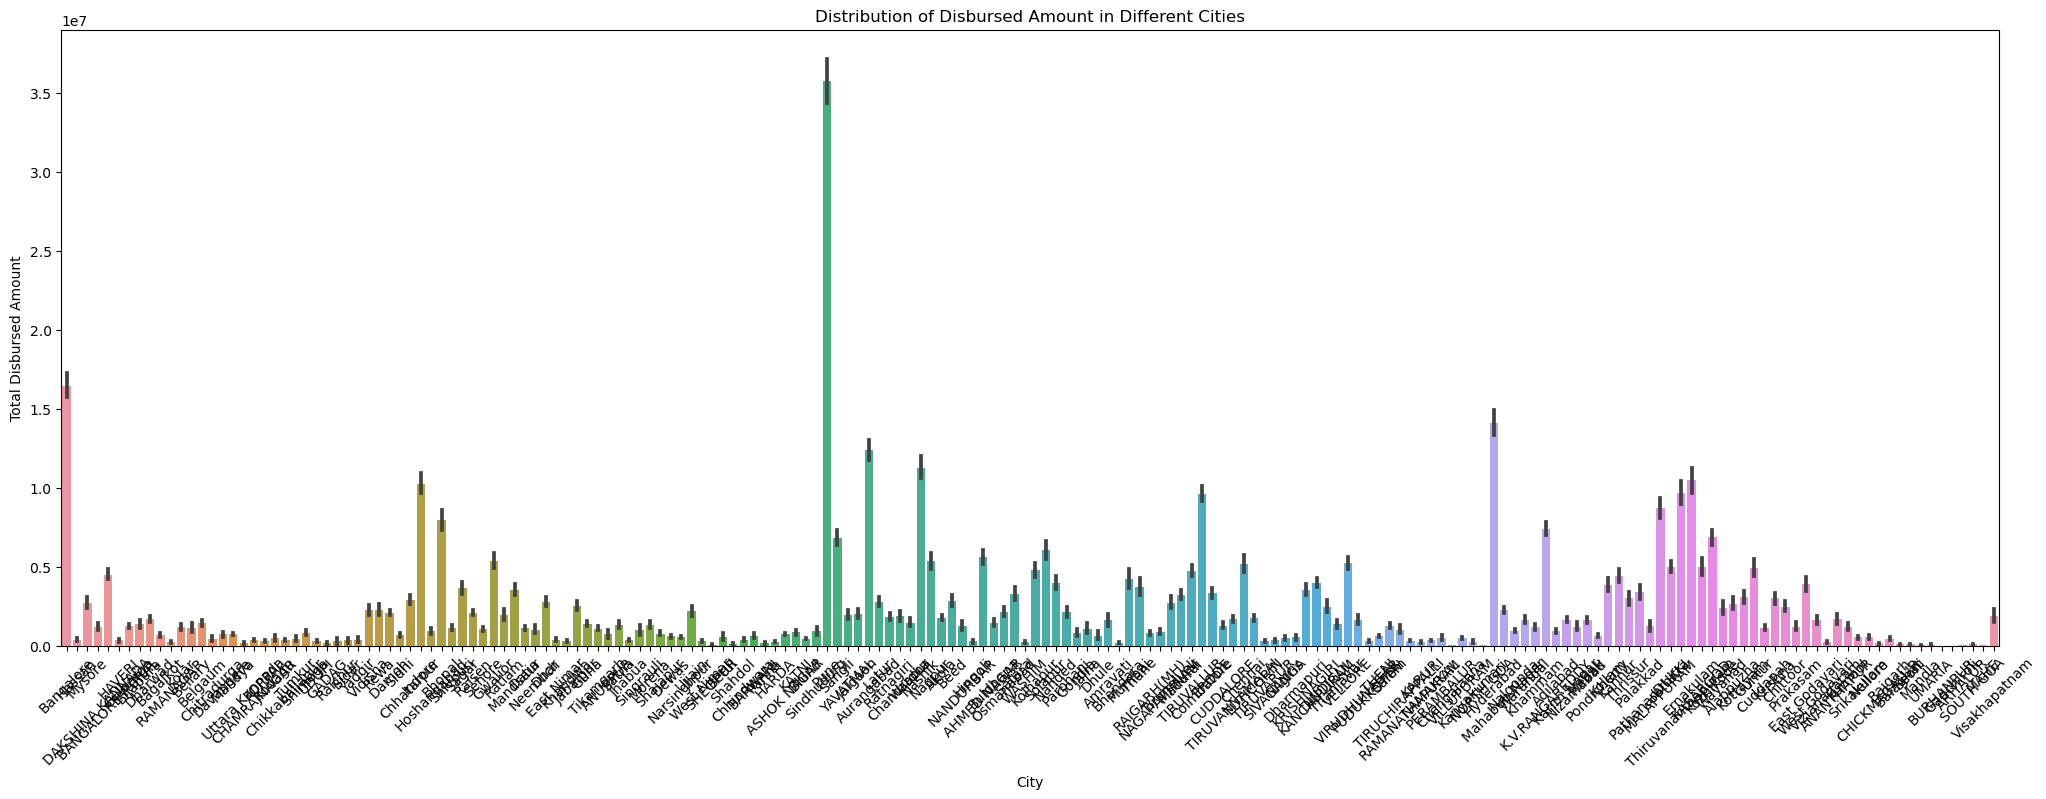

In [180]:
# Visualize the distribution of 'Disbursed Amount' in different cities
plt.figure(figsize=(25, 8))
sns.barplot(x='City', y='Disbursed Amount', data=data, estimator=sum)
plt.title('Distribution of Disbursed Amount in Different Cities')
plt.xlabel('City')
plt.ylabel('Total Disbursed Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
From the visualizations and analysis, we can derive the following interesting insights:

The boxplot of 'Amount Pending' across different states shows the variation in pending amounts for borrowers in each state. This can help identify states with higher or lower pending amounts.

The scatter plot of 'Interest Rate' vs. 'Tenure' helps in understanding if there is any correlation or pattern between the interest rate and tenure for the borrowers. It can reveal if longer tenures are associated with higher or lower interest rates.

The bar plot of 'Disbursed Amount' in different cities shows the total disbursed amount for borrowers in each city. This can help identify cities with higher or lower disbursement amounts and potential areas for further analysis or targeted strategies.

These insights can provide valuable information for decision-making and strategy formulation in the lending process.